## Laplace Solver

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import time

def L2_error(p, pn):
    return np.sqrt(np.sum((p - pn)**2)/np.sum(pn**2))

def laplace2d(p, l2_target, ma_wire):
    '''Iteratively solves the Laplace equation using the Jacobi method

    Parameters:
    ----------
    p: 2D array of float
        Initial potential distribution
    l2_target: float
        target for the difference between consecutive solutions

    Returns:
    -------
    p: 2D array of float
        Potential distribution after relaxation
    '''

    l2norm = 1
    pn = np.empty_like(p)
    while l2norm > l2_target:
        pn = p.copy()
        p[1:-1,1:-1] = .25 * (pn[1:-1,2:] + pn[1:-1, :-2] \
                              + pn[2:, 1:-1] + pn[:-2, 1:-1])

        ##periodic B.C. along x
        p[1:-1, 0] = .25 * (pn[1:-1, 1] + pn[1:-1, -2] \
                            + pn[2:, 0] + pn[:-2, 0])
        p[1:-1, -1] = p[1:-1, 0]
        ##zero potential at the wire
        p[ma_wire] = 0.0

        ##relative l2 norm
        l2norm = L2_error(p, pn)

    return p


# grid spacing
  
# system length
Lx = 100.
Ly = 1000.
# number of grids
Nx = int(Lx / h) + 1
Ny = int(Ly / h) + 1
# construct grids
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
xv, yv = np.meshgrid(x, y) # y dir. along column, x dir. along row

# wire size
dx = 10.
dy = 10.
# wire boundary
wire_left   = Lx/2. - dx/2.
wire_right  = Lx/2. + dx/2.
wire_bottom = 110.  - dy/2.
wire_top    = 110.  + dy/2.
# mask array for wire
xcond = np.logical_and(xv <= wire_right, xv >= wire_left)
ycond = np.logical_and(yv <= wire_top, yv >= wire_bottom)
ma_wire = np.logical_and(xcond, ycond)

# error control
l2_target = 1e-6
# initial guess
pot_guess = 0.5
# initialize potential
pot = np.ones_like(xv) * pot_guess
# Dirichlet B.C. at y = 0 and y = Ly
pot[0, 0:] = 1.
pot[-1, 0:] = 0.
# boundary at the wire
pot[ma_wire] = 0.

# call laplace solver
start = time.time()
pot = laplace2d(pot, l2_target, ma_wire)
end = time.time()
print('Laplace solver with wire takes ', end-start, ' secs')

# call laplace solver without wire for comparison
# reset mask at wire to false, i.e., no wire
no_wire = np.zeros_like(xv, dtype=bool)
# construct potential array
pot_nowire = pot.copy()
# call laplace solver
start = time.time()
pot_nowire = laplace2d(pot_nowire, l2_target, no_wire)
end = time.time()
print('Laplace solver without wire takes ', end-start, ' secs')

# plot
# plot parameters
plt.rcParams.update({'font.size': 23})
plt.rcParams['font.family'] = "DejaVu", "serif"
plt.rcParams['mathtext.fontset'] = "dejavuserif"
plt.rcParams["lines.linewidth"] = 1.5

# figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 12))

# panel (a)
ax = axs[0]

# color map
cmap = plt.get_cmap('rainbow')
vmax = np.max(pot)
vmin = vmax / 1e3
norm = colors.LogNorm(vmin=vmin, vmax=vmax, clip=True)

# image
im = ax.pcolormesh(xv, yv, pot, cmap=cmap, norm=norm)

# label
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')


# panel (b)
ax = axs[1]

# # color map
# cmap = plt.get_cmap('rainbow')
# vmax = np.max(pot_nowire)
# vmin = vmax / 1e3
# norm = colors.LogNorm(vmin=vmin, vmax=vmax, clip=True)

# image
im = ax.pcolormesh(xv, yv, pot_nowire, cmap=cmap, norm=norm)

# label
ax.set_xlabel(r'$x$')

# colorbar
plt.tight_layout()
fig.subplots_adjust(right=0.8)
pos = ax.get_position()
cax = fig.add_axes([0.82, pos.y0, 0.04, pos.height])
cb = fig.colorbar(im, cax=cax, orientation='vertical')
cb.ax.set_ylabel('potential')
plt.savefig('./laplace_2d.png')
plt.close()

Laplace solver with wire takes  564.3354034423828  secs
Laplace solver without wire takes  240.8367519378662  secs


C:\Users\Donglai\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
C:\Users\Donglai\Anaconda3\lib\site-packages\ipykernel_launcher.py:137: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


## Plot the Potential

C:\Users\Donglai\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
C:\Users\Donglai\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


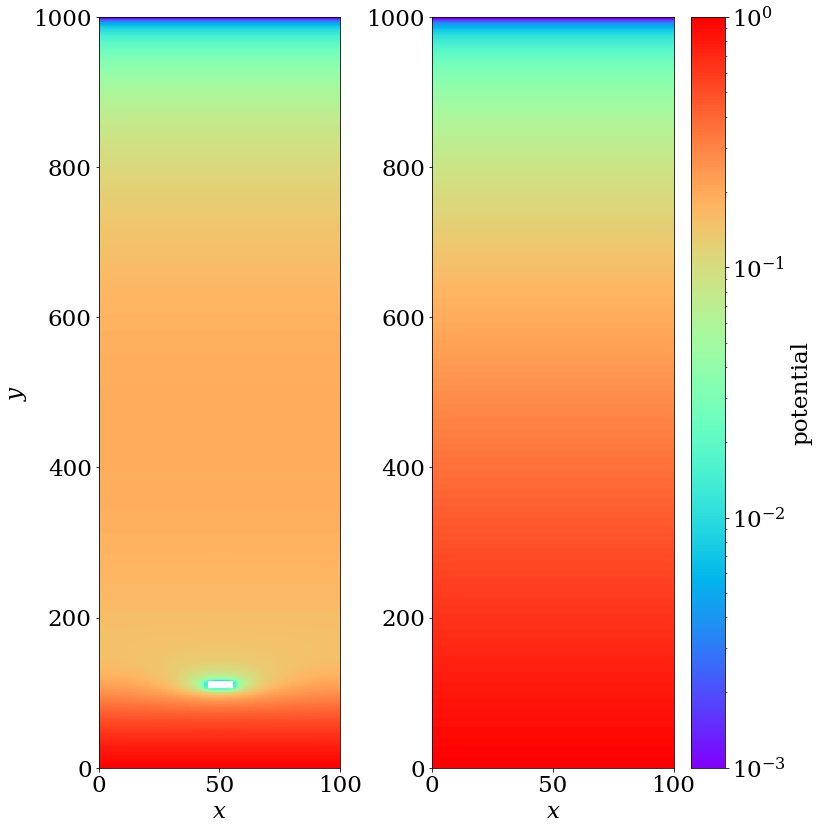

In [2]:
plt.rcParams.update({'font.size': 23})
plt.rcParams['font.family'] = "DejaVu", "serif"
plt.rcParams['mathtext.fontset'] = "dejavuserif"
plt.rcParams["lines.linewidth"] = 1.5

# figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 12))

# panel (a)
ax = axs[0]

# color map
cmap = plt.get_cmap('rainbow')
vmax = np.max(pot)
vmin = vmax / 1e3
norm = colors.LogNorm(vmin=vmin, vmax=vmax, clip=True)

# image
im = ax.pcolormesh(xv, yv, pot, cmap=cmap, norm=norm)

# label
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')


# panel (b)
ax = axs[1]

# # color map
# cmap = plt.get_cmap('rainbow')
# vmax = np.max(pot_nowire)
# vmin = vmax / 1e3
# norm = colors.LogNorm(vmin=vmin, vmax=vmax, clip=True)

# image
im = ax.pcolormesh(xv, yv, pot_nowire, cmap=cmap, norm=norm)

# label
ax.set_xlabel(r'$x$')

# colorbar
plt.tight_layout()
fig.subplots_adjust(right=0.8)
pos = ax.get_position()
cax = fig.add_axes([0.82, pos.y0, 0.04, pos.height])
cb = fig.colorbar(im, cax=cax, orientation='vertical')
cb.ax.set_ylabel('potential')
plt.show()

## Plot the Efield

C:\Users\Donglai\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [9.92060500e-01 9.92060465e-01 9.92060362e-01 ... 9.92060362e-01
  9.92060465e-01 9.92060500e-01]
 [9.84121068e-01 9.84120999e-01 9.84120792e-01 ... 9.84120792e-01
  9.84120999e-01 9.84121068e-01]
 ...
 [1.14684247e-03 1.14684264e-03 1.14684247e-03 ... 1.14684247e-03
  1.14684264e-03 1.14684247e-03]
 [5.73423938e-04 5.73423849e-04 5.73423938e-04 ... 5.73423938e-04
  5.73423849e-04 5.73423938e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


C:\Users\Donglai\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [9.98101318e-01 9.98101319e-01 9.98101318e-01 ... 9.98101318e-01
  9.98101319e-01 9.98101318e-01]
 [9.96202652e-01 9.96202651e-01 9.96202652e-01 ... 9.96202652e-01
  9.96202651e-01 9.96202652e-01]
 ...
 [8.44535349e-04 8.44534965e-04 8.44535349e-04 ... 8.44535349e-04
  8.44534965e-04 8.44535349e-04]
 [4.22266717e-04 4.22266909e-04 4.22266717e-04 ... 4.22266717e-04
  4.22266909e-04 4.22266717e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


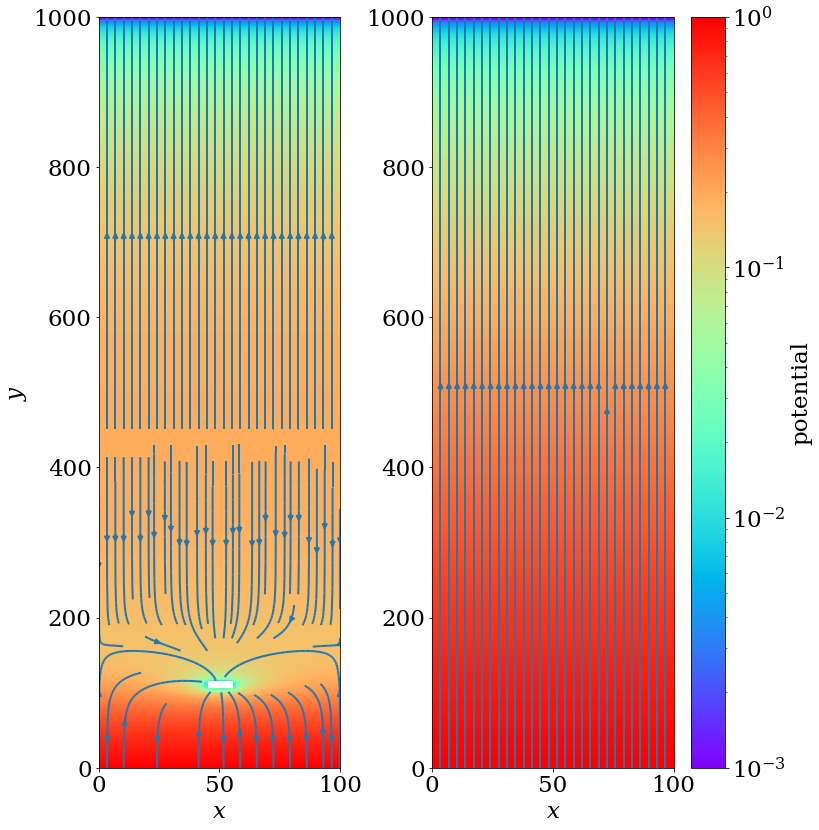

In [58]:
def getEfield(pot):
    """
    Get the field from position
    """
    # Calculate the E field
    # Leap frog : ie . E1 = -(V2 - V0)/2
    
    Ex = -(np.hstack((pot[:,1:],pot[:,0:1])) - np.hstack((pot[:,-1:],pot[:,0:-1])))/2
    # For Ey just Use E
    Ey = -(pot[2:,:]- pot[:-2,:])/2
    
    # Here without Ey boundary, E0 = E1 E1000 =E999
    #Add Ey boundary,
    Ey_0 = Ey[0:1,:]
    Ey_1000 = Ey[-1:,:]
    Ey = np.vstack((Ey_0,Ey))
    Ey = np.vstack((Ey,Ey_1000))
    
    return Ex,Ey

# figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 12))

# panel (a)
ax = axs[0]

# color map
cmap = plt.get_cmap('rainbow')
vmax = np.max(pot)
vmin = vmax / 1e3
norm = colors.LogNorm(vmin=vmin, vmax=vmax, clip=True)

# image
im = ax.pcolormesh(xv, yv, pot, cmap=cmap, norm=norm)

# streamline
Ex,Ey = getEfield(pot)
eline = ax.streamplot(xv,yv,Ex,Ey,linewidth=2)
# label
ax.set_xlim(0,100)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')


# panel (b)
ax = axs[1]


im = ax.pcolormesh(xv, yv, pot_nowire, cmap=cmap, norm=norm)
Ex_nowire,Ey_nowire = getEfield(pot_nowire)
eline = ax.streamplot(xv,yv,Ex_nowire,Ey_nowire,linewidth=2)
# label
ax.set_xlabel(r'$x$')
ax.set_xlim(0,100)
# colorbar
plt.tight_layout()
fig.subplots_adjust(right=0.8)
pos = ax.get_position()
cax = fig.add_axes([0.82, pos.y0, 0.04, pos.height])
cb = fig.colorbar(im, cax=cax, orientation='vertical')
cb.ax.set_ylabel('potential')

plt.savefig('./laplace_2d_efield.png')
plt.show()

### Interp method
When interp the E field , use

$$Ex(y,x) = -(V(y,x+1) - V(y,x-1))/2$$ 
$$Ey(y,x) = -(V(y+1,x) - V(y-1,x))/2$$

When interp the E field at the particle, use double linear interpolation

$f(x, y)=\frac{\left(y_{1}-y\right)\left(x_{1}-x\right)}{\left(y_{1}-y_{0}\right)\left(x_{1}-x_{0}\right)} f\left(x_{0}, y_{0}\right)+\frac{\left(y_{1}-y\right)\left(x-x_{0}\right)}{\left(y_{1}-y_{0}\right)\left(x_{1}-x_{0}\right)} f\left(x_{1}, y_{0}\right)+\frac{\left(y-y_{0}\right)\left(x_{1}-x\right)}{\left(y_{1}-y_{0}\right)\left(x_{1}-x_{0}\right)} f\left(x_{0}, y_{1}\right)+\frac{\left(y-y_{0}\right)\left(x-x_{0}\right)}{\left(y_{1}-y_{0}\right)\left(x_{1}-x_{0}\right)} f\left(x_{1}, y_{1}\right)$

So that $$Ex(x, y) ={\left(y_{1}-y\right)\left(x_{1}-x\right)} Ex\left(x_{0}, y_{0}\right)+{\left(y_{1}-y\right)\left(x-x_{0}\right)} Ex\left(x_{1}, y_{0}\right)+{\left(y-y_{0}\right)\left(x_{1}-x\right)} Ex\left(x_{0}, y_{1}\right)+{\left(y-y_{0}\right)\left(x-x_{0}\right)} Ex\left(x_{1}, y_{1}\right) $$
and
$$Ey(x, y) ={\left(y_{1}-y\right)\left(x_{1}-x\right)} Ey\left(x_{0}, y_{0}\right)+{\left(y_{1}-y\right)\left(x-x_{0}\right)} Ey\left(x_{1}, y_{0}\right)+{\left(y-y_{0}\right)\left(x_{1}-x\right)} Ey\left(x_{0}, y_{1}\right)+{\left(y-y_{0}\right)\left(x-x_{0}\right)} Ey\left(x_{1}, y_{1}\right) $$

For the trace calculation, use(Here subnotation does not mean grid)
Use 2nd Order function
$$
\begin{array}{ll}
\Delta X_{1}=\Delta t\left(V^{t}\right) & \Delta V_{1}=\Delta t A\left(X^{t}, V^{t}\right) \\
\Delta X_{2}=\Delta t\left(V^{t}+\Delta V_{1} / 2\right) & \Delta V_{2}=\Delta t A\left(X^{t}+\Delta X_{1} / 2, V^{t}+\Delta V_{1} / 2\right)
\end{array}
$$

$$
\begin{array}{l}
X^{t+1}=X^{t}+\left(\Delta X_{1}+\Delta X_{2}\right) / 2 \\
V^{t+1}=V^{t}+\left(\Delta V_{1}+\Delta V_{2}\right) / 2
\end{array}
$$


[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [9.92060500e-01 9.92060465e-01 9.92060362e-01 ... 9.92060362e-01
  9.92060465e-01 9.92060500e-01]
 [9.84121068e-01 9.84120999e-01 9.84120792e-01 ... 9.84120792e-01
  9.84120999e-01 9.84121068e-01]
 ...
 [1.14684247e-03 1.14684264e-03 1.14684247e-03 ... 1.14684247e-03
  1.14684264e-03 1.14684247e-03]
 [5.73423938e-04 5.73423849e-04 5.73423938e-04 ... 5.73423938e-04
  5.73423849e-04 5.73423938e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [9.98101318e-01 9.98101319e-01 9.98101318e-01 ... 9.98101318e-01
  9.98101319e-01 9.98101318e-01]
 [9.96202652e-01 9.96202651e-01 9.96202652e-01 ... 9.96202652e-01
  9.96202651e-01 9.96202652e-01]
 ...
 [8.44535349e-04 8.44534965e-04 8.44535349e-04 ... 8.44535349e-04
  8.44534965e-04 8.44535349e-04]

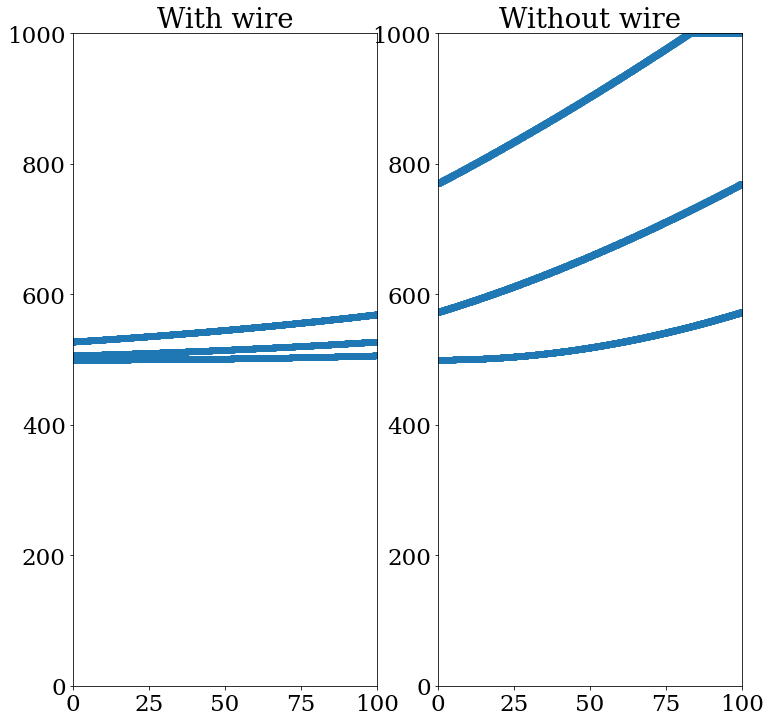

In [70]:
# Orbit


def interpfield(x,y,Ex,Ey):
    """
    interp the E field 
    (position is not on grid when do tracing)
    Use inter linear
    f(x,y)
    
    """
    xx = x%100
    yy = y%1000
    x0 = int(xx)
    x1 = int(xx) + 1
    y0 = int(yy) 
    y1 = int(yy) + 1
    xx = x%100
    Ex_p = (y1-yy)*(x1-xx)*Ex[y0,x0] + (y1-yy)*(xx-x0)*Ex[y0,x1] + (yy-y0)*(x1-xx)*Ex[y1,x0] + (yy-y0)*(xx-x0)*Ex[y1,x1]
    Ey_p = (y1-yy)*(x1-xx)*Ey[y0,x0] + (y1-yy)*(xx-x0)*Ey[y0,x1] + (yy-y0)*(x1-xx)*Ey[y1,x0] + (yy-y0)*(xx-x0)*Ey[y1,x1]
    return Ex_p,Ey_p

def trace(x0,y0,vx0,vy0,pot,steps = 1000,t=0.01,alpha = 1 ):
    """
    Get the particle trace
    """
    # trace save the information of position and velocity
    x_trace = np.zeros(steps)
    y_trace = np.zeros(steps)
    vx_trace = np.zeros(steps)
    vy_trace = np.zeros(steps)
    
    
    x_trace[0] = x0
    y_trace[0] = y0
    vx_trace[0] = vx0
    vy_trace[0] = vy0
    
    Ex,Ey = getEfield(pot)
    
    # p means particle
    Ex_p,Ey_p = interpfield(x_trace[0],y_trace[0],Ex,Ey)
    for i in range(1,steps,1):
        # Use RK2
        vxt,vyt = vx_trace[i-1],vy_trace[i-1]
        xt,yt = x_trace[i-1],y_trace[i-1]
        
        
        Ex_p,Ey_p = interpfield(xt,yt,Ex,Ey)
                
        Dx1,Dy1 = vxt*t,vyt*t
        
        Dvx1,Dvy1 = t* alpha*Ex_p ,t* alpha*Ey_p
        
        Dx2,Dy2 = t*(vxt + Dvx1/2), t*(vyt + Dvy1/2)
        
        Ex_p1,Ey_p1 = interpfield(xt + Dx1/2,yt + Dy1/2,Ex,Ey)
        Dvx2,Dvy2 = t*alpha*Ex_p1,t*alpha*Ey_p1 
        xt1,yt1 = xt +(Dx1 + Dx2)/2,yt +(Dy1 + Dy2)/2
        vxt1,vyt1 = vxt +(Dvx1 + Dvx2)/2,vyt +(Dvy1 + Dvy2)/2
        
        # Save the trace
        if yt1>1000:
            yt1 = 1000
        if yt1 < 0:
            yt1 = 0
        x_trace[i],y_trace[i] = xt1%100,yt1
        
        vx_trace[i],vy_trace[i] = vxt1,vyt1
        
        

    
    return x_trace,y_trace

x0 = 0
y0 = 500
vx0 = 10
vy0 = 0


x_trace,y_trace = trace(x0,y0,vx0,vy0,pot,steps = 3000,t=0.01,alpha = 1800 )
x_trace_nowire,y_trace_nowire = trace(x0,y0,vx0,vy0,pot_nowire,steps = 3000,t=0.01,alpha = 1800)
fig, axs = plt.subplots(1, 2, figsize=(12, 12))
axs[0].scatter(x_trace,y_trace)
axs[0].set_xlim(0,100)
axs[0].set_ylim(0,1000)
axs[0].set_title('With wire')
trace2 = axs[1].scatter(x_trace_nowire,y_trace_nowire)
axs[1].set_xlim(0,100)
axs[1].set_ylim(0,1000)
axs[1].set_title('Without wire')
    
    
plt.savefig('./particle_trace.png')
plt.show()

# x= 1
# y = 1
# getfield(x,y,pot)




In [36]:
a,b = 1+2,2+3
print(b)

5
